In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
DATA_DIR = os.path.abspath('../../data/stanfordSentimentTreebank/')

In [3]:
import re

In [4]:
import nltk

In [5]:
from nltk.corpus import framenet as fn

In [6]:
from nltk.stem import WordNetLemmatizer

In [7]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [8]:
wordnet_lemmatizer = WordNetLemmatizer()

In [9]:
#create an object of class PorterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()

In [10]:
def get_frames_from_txt(txt, count_thold=None):
    ws = re.split('\s', txt)
    frs = [fr['ID'] for w in ws for fr in fn.frames_by_lemma(porter.stem(w))]
    frs = pd.Series(frs).value_counts()
    if count_thold is not None:
        frs = frs[frs>=count_thold]
    frs = [fn.frame_by_id(fr)['name'] for fr in frs.index]
    return frs

In [12]:
from tqdm.notebook import tqdm

In [13]:
train_ds = pd.read_csv(DATA_DIR+'/imdb_train_with_preds.csv', index_col=0)
print(train_ds.shape)
train_ds.head()

(25000, 772)


,sentiment,text,bert_0,bert_1,bert_2,bert_3,bert_4,bert_5,bert_6,bert_7,...,bert_760,bert_761,bert_762,bert_763,bert_764,bert_765,bert_766,bert_767,sentiment_bin,prediction
0,pos,"Since Educating Rita, Julie Walters has been o...",-0.217232,-0.278537,0.024592,-0.190077,0.338728,0.198379,0.155497,0.505957,...,-0.048404,-0.267151,-0.375385,-0.221558,0.410194,-0.030859,0.250553,0.060898,True,True
1,pos,This is one of the best movies out there and t...,-0.052009,-0.275612,0.290984,0.037968,0.363718,0.050480,0.126078,0.849306,...,0.008719,-0.378950,-0.302224,0.030559,0.274638,-0.174276,0.252467,-0.049769,True,True
2,pos,Dumland focuses on the lives of one (American?...,-0.169023,-0.005889,0.382560,-0.115467,0.296713,0.063204,0.051784,0.567073,...,0.170062,-0.453052,-0.073050,-0.352005,0.217358,0.124859,0.451700,0.174639,True,True
3,pos,At one end of the Eighties Warren Beatty creat...,-0.104024,0.118619,0.313575,0.005333,0.251248,-0.109587,-0.155153,0.548621,...,0.189538,-0.187595,-0.031585,-0.204041,0.114504,-0.136630,0.328830,0.035915,True,True
4,pos,An excellent movie about two cops loving the s...,-0.290859,-0.307483,0.359930,0.252686,0.421740,0.044342,0.123191,0.444648,...,0.066162,-0.316122,-0.594344,0.089560,0.260170,-0.233630,0.373538,0.026722,True,True


In [14]:
len(train_ds)

25000

In [15]:
sub_ds = train_ds#.sample(10000)
sub_ds['sentiment_bin'].mean()

0.5

In [16]:
words_unique = set()
for txt in tqdm(sub_ds['text']):
    ws = [w.lower() for w in re.findall('\w+', txt)]
    words_unique = words_unique|set(ws)

In [17]:
len(words_unique)

74891

In [18]:
lemmas = set([porter.stem(w) for w in words_unique])
len(lemmas)

51339

In [19]:
lemma_frame_dict = {}
for lemma in tqdm(lemmas):
    frames = [fr['name'] for fr in fn.frames_by_lemma(lemma)]
    if len(frames)>0:
        lemma_frame_dict[lemma] = frames

In [37]:
import json

In [38]:
with open('lemma_frame_dict.json','w') as f:
    json.dump(lemma_frame_dict, f)

In [20]:
def get_frames_from_txt(txt, count_thold=None):
    lemmas = [porter.stem(x.lower()) for x in re.findall('\w+', txt)]
    frs = [frame for lemma in lemmas for frame in lemma_frame_dict.get(lemma,[])]
    frs = pd.Series(frs).value_counts()
    word_count = len(lemmas)
    return frs, word_count

In [286]:
fn.frames_by_lemma('good')[2]

frame (1383): Desirable_event

[URL] https://framenet2.icsi.berkeley.edu/fnReports/data/frame/Desirable_event.xml

[definition]
  A particular State_of_affairs is desirable.  The State_of_affairs
  may be required to achieve a Purpose.  A set of Circumstances may
  be specified under which the assessment of desirability holds.
  'You should take the doses about 12 hours apart and at the same
  time each day.' ' If the metal is seriously rusted or warped, it
  should be repaired or replaced with a chimney top damper.' 'To
  ensure that, you should have no CLASSPATH set.'

[semTypes] 0 semantic types

[frameRelations] 5 frame relations
  <Parent=Desirability -- Inheritance -> Child=Desirable_event>
  <Parent=Desirable_event -- Using -> Child=Taking_sides>
  <Parent=Required_event -- Using -> Child=Desirable_event>
  <Source=Required_event -- ReFraming_Mapping -> Target=Desirable_event>
  <Neutral=Preferred_alternative_scenario -- Perspective_on -> Perspectivized=Desirable_event>

[lexUni

In [281]:
fn.frames_by_lemma('world')[7]

IndexError: list index out of range

In [252]:
get_frames_from_txt('hello world')

(Being_born           1
 Attention_getting    1
 Political_locales    1
 dtype: int64, 2)

In [253]:
get_frames_from_txt('hello')

(Attention_getting    1
 dtype: int64, 1)

In [251]:
train_frames.head()

,Appellations,Personal_relationship,Stimulus_focus,Leadership,Containers,Clothing,People_by_vocation,Emotion_directed,Experiencer_obj,Medical_conditions,...,Visit_host_stay,Visiting_scenario,Visiting_scenario_arrival,Visiting_scenario_departing,Visiting_scenario_stay,Visitor_and_host,Visitor_arrival,Visitor_departure,Visitor_scenario,Wholes_and_parts
0,0.414286,0.400000,0.385714,0.357143,0.357143,0.342857,0.342857,0.342857,0.342857,0.328571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085714,0.0
1,0.340580,0.311594,0.442029,0.289855,0.376812,0.405797,0.333333,0.391304,0.355072,0.347826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130435,0.0
2,0.366501,0.391376,0.376451,0.275290,0.366501,0.414594,0.325041,0.368159,0.344942,0.344942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091211,0.0
3,0.291667,0.287698,0.369048,0.224206,0.317460,0.347222,0.261905,0.349206,0.301587,0.269841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097222,0.0
4,0.338235,0.367647,0.294118,0.161765,0.323529,0.338235,0.264706,0.264706,0.264706,0.264706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0


# Find subframe relations

In [21]:
frs = fn.frame_relations(type='Subframe')
len(frs)

131

In [22]:
subframes = {}
for fr in tqdm(frs):
    super_frame = fr['superFrameName']
    sub_frame = fr['subFrameName']
    subframes[super_frame] = subframes.get(super_frame, set([]))|set([sub_frame])

In [23]:
subframes_trans = subframes.copy()
iter_ = 0
while True:
    #print('iter', iter_)
    trans_exist = False
    for super_frame in subframes_trans.keys():
        subframes_ = subframes_trans[super_frame]
        for subframe in subframes_:
            if subframe in subframes_trans.keys() and not all([x in subframes_ for x in subframes_trans[subframe]]):
                trans_exist = True
                subframes_trans[super_frame] = subframes_trans[super_frame]|subframes_trans[subframe]
                
    if not trans_exist:
        break
    iter_  += 1

In [24]:
bin_ds_frames_ls = []
for txt in tqdm(sub_ds['text']):
    frs, word_count = get_frames_from_txt(txt)
    frs['word_count'] = word_count
    bin_ds_frames_ls.append(frs)

In [25]:
bin_ds_frames = pd.DataFrame(bin_ds_frames_ls)
bin_ds_frames = bin_ds_frames.fillna(0)
for fr in fn.frames():
    fr_name = fr['name']
    if fr_name not in bin_ds_frames.columns:
        bin_ds_frames[fr_name] = 0
bin_ds_frames.index = sub_ds.index

In [26]:
bin_ds_frames.shape, len(fn.frames())

((25000, 1222), 1221)

In [27]:
for super_frame, subframes_ in subframes_trans.items():
    bin_ds_frames[super_frame] += bin_ds_frames[list(subframes_)].sum(1)

In [28]:
bin_ds_frames_normed = (bin_ds_frames.T/bin_ds_frames['word_count']).T
bin_ds_frames_normed = bin_ds_frames_normed.drop('word_count',1)

In [29]:
bin_ds_frames_normed.head()

,Appellations,Personal_relationship,Stimulus_focus,Leadership,Containers,Clothing,People_by_vocation,Emotion_directed,Experiencer_obj,Medical_conditions,...,Visit_host_stay,Visiting_scenario,Visiting_scenario_arrival,Visiting_scenario_departing,Visiting_scenario_stay,Visitor_and_host,Visitor_arrival,Visitor_departure,Visitor_scenario,Wholes_and_parts
0,0.414286,0.400000,0.385714,0.357143,0.357143,0.342857,0.342857,0.342857,0.342857,0.328571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085714,0.0
1,0.340580,0.311594,0.442029,0.289855,0.376812,0.405797,0.333333,0.391304,0.355072,0.347826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130435,0.0
2,0.366501,0.391376,0.376451,0.275290,0.366501,0.414594,0.325041,0.368159,0.344942,0.344942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091211,0.0
3,0.291667,0.287698,0.369048,0.224206,0.317460,0.347222,0.261905,0.349206,0.301587,0.269841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097222,0.0
4,0.338235,0.367647,0.294118,0.161765,0.323529,0.338235,0.264706,0.264706,0.264706,0.264706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0


In [40]:
bin_ds_frames_normed.to_csv('bin_ds_frames_normed.csv')

In [30]:
bin_ds_words = []
for txt in tqdm(sub_ds['text']):
    ws = [porter.stem(x.lower()) for x in re.findall('\w+', txt)]
    lexemas = [porter.stem(w) for w in ws]
    lexemas = pd.Series(lexemas).value_counts()
    bin_ds_words.append(lexemas)

In [31]:
cdss = []
for i in tqdm(range(25)):
    cds = pd.DataFrame(bin_ds_words[i*1000:(i+1)*1000])
    cdss.append(cds)

In [32]:
len(cdss)

25

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
from sklearn.model_selection import KFold

In [44]:
kf = KFold(n_splits=10, random_state=42, shuffle=False)

In [45]:
bert_feats = [f for f in sub_ds.columns if f.startswith('bert_')]

In [46]:
def test_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    return acc

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
acc_frames = []
#acc_words = []
acc_bert = []
for train_index, test_index in tqdm(kf.split(sub_ds), total=kf.n_splits):
    train_y = sub_ds['sentiment_bin'].iloc[train_index]
    test_y = sub_ds['sentiment_bin'].iloc[test_index]
    
    train_frames = bin_ds_frames_normed.iloc[train_index]
    test_frames = bin_ds_frames_normed.iloc[test_index]
    
    train_bert = sub_ds[bert_feats].iloc[train_index]
    test_bert = sub_ds[bert_feats].iloc[test_index]
    
    acc_frames.append(test_model(LogisticRegression(), train_frames, train_y, test_frames, test_y))
    acc_bert.append(test_model(LogisticRegression(), train_bert, train_y, test_bert, test_y))

/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [49]:
import seaborn as sns

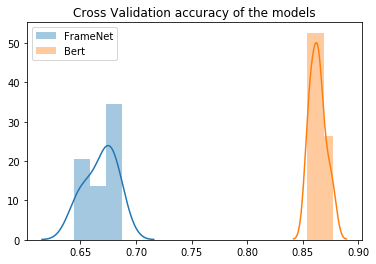

In [51]:
sns.distplot(acc_frames, label='FrameNet')
sns.distplot(acc_bert, label='Bert')
plt.legend()
plt.title('Cross Validation accuracy of the model')
plt.show()

In [53]:
acc_bert_frames = []
for train_index, test_index in tqdm(kf.split(sub_ds), total=kf.n_splits):
    train_y = sub_ds['sentiment_bin'].iloc[train_index]
    test_y = sub_ds['sentiment_bin'].iloc[test_index]
    
    train_frames = bin_ds_frames_normed.iloc[train_index]
    test_frames = bin_ds_frames_normed.iloc[test_index]
    
    train_bert = sub_ds[bert_feats].iloc[train_index]
    test_bert = sub_ds[bert_feats].iloc[test_index]
    
    lr_bert = LogisticRegression()
    lr_bert.fit(train_bert, train_y)
    train_preds_bert = lr_bert.predict(train_bert)
    test_preds_bert = lr_bert.predict(test_bert)

    acc_bert_frames.append(
        test_model(LogisticRegression(), train_frames, train_preds_bert, test_frames, test_preds_bert))

/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

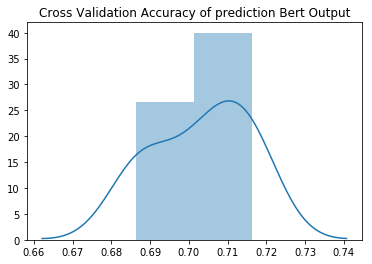

In [57]:
sns.distplot(acc_bert_frames)
plt.title('Cross Validation Accuracy of prediction Bert Output')
plt.show()

In [60]:
lr_bert = LogisticRegression()
lr_bert.fit(sub_ds[bert_feats], sub_ds['sentiment_bin'])
preds_bert = lr_bert.predict(sub_ds[bert_feats])

/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
tholds = np.arange(0,1.01,0.05)
accs = []

for thold in tqdm(tholds):
    rf_frames = RandomForestClassifier()
    rf_frames.fit(bin_ds_frames_normed>=thold, sub_ds['sentiment_bin'])
    preds_frames = rf_frames.predict(bin_ds_frames_normed>=thold)
    accs.append(accuracy_score(preds_bert, preds_frames))

/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/egor/anaconda3/lib/python3.7/site-packages/skl

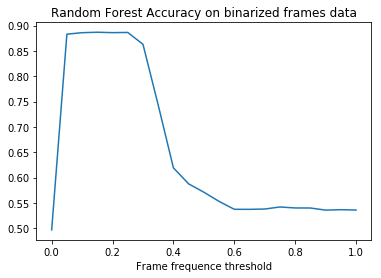

In [65]:
plt.plot(tholds, accs)
plt.xlabel('Frame frequence threshold')
plt.title('Random Forest Accuracy on binarized frames data')
plt.show()

In [66]:
thold = tholds[np.argmax(accs)]
thold, max(accs)

(0.15000000000000002, 0.8868)

In [298]:
len(fn.frames())

1221

In [297]:
(train_frames>0).sum(1).max()

1100

In [293]:
(train_frames>0).sum().max()

22500

In [303]:
print(bin_ds_short.iloc[:5,:5].to_latex())

\begin{tabular}{llllll}
\toprule
{} &  Appellations &  Personal\_relationship &  Stimulus\_focus &  Leadership &  Containers \\
\midrule
10684 &          True &                   True &            True &        True &        True \\
10611 &          True &                   True &            True &        True &        True \\
16289 &          True &                   True &            True &        True &        True \\
12142 &          True &                   True &            True &        True &        True \\
5367  &          True &                   True &            True &        True &        True \\
\bottomrule
\end{tabular}



## Trying FCA

In [183]:
train_ds['bert_preds'] = preds_bert

In [118]:
import sys

In [127]:
if os.path.abspath('../..') not in sys.path:
    sys.path.append(os.path.abspath('../..'))

In [128]:
import lib.fca_interp as fcai

In [109]:
bin_ds = bin_ds_frames_normed>=thold

In [110]:
bin_ds_pos = bin_ds[preds_bert]
bin_ds_pos.shape

(12422, 1221)

In [111]:
for x in [0,1]:
    bin_ds_pos = bin_ds_pos.drop(bin_ds_pos.columns[(bin_ds_pos.mean()==x)],1)

In [112]:
bin_ds_pos.shape

(12422, 1053)

In [184]:
bin_ds_short = bin_ds.sample(1000)

In [189]:
bin_ds_short[train_ds['bert_preds']].shape

/home/egor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(471, 1221)

In [190]:
cntx = fcai.BinaryContext(bin_ds_short[train_ds['bert_preds']])
cntx_full = fcai.BinaryContext(bin_ds_short)

/home/egor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [194]:
fm = fcai.FormalManager(cntx, context_full=cntx_full)

In [200]:
objs = cntx.get_objs(is_full=False)
max_cncpts = []
for g in tqdm(objs):
    int_ = cntx.get_intent([g], is_full=True)
    ext_ = cntx.get_extent(int_, is_full=True)
    c = fcai.Concept(ext_, int_)
    max_cncpts.append(c)

In [205]:
max_cncpts = fm.get_unique_concepts(max_cncpts)
len(max_cncpts)

471

In [321]:
fm._concepts = max_cncpts
fm.calc_strongness(use_tqdm=True)

In [320]:
sns.distplot([c._metrics['strongness'] for c in fm.get_concepts()])

KeyError: 'strongness'

In [211]:
strong_hyps = [c for c in fm.get_concepts() if c._metrics['strongness']>=1]
len(strong_hyps)

105

In [213]:
len(fm.calc_cover_of_concepts(strong_hyps))

105

In [247]:
fm.construct_concepts(algo='Agglomerative_Bootstrap', strong_concepts=strong_hyps,
                      n_best_bootstrap_concepts=10, sample_size_bootstrap=10,
                      n_bootstrap_epochs=100, use_tqdm=True)

/home/egor/Documents/hse_comp_ling/lib/fca_interp.py:741: RuntimeWarning:

divide by zero encountered in log2

/home/egor/Documents/hse_comp_ling/lib/fca_interp.py:742: RuntimeWarning:

divide by zero encountered in log2



Exception in thread Thread-12:
Traceback (most recent call last):
  File "/home/egor/anaconda3/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/home/egor/.local/lib/python3.7/site-packages/tqdm/_monitor.py", line 78, in run
    instances = self.get_instances()
  File "/home/egor/.local/lib/python3.7/site-packages/tqdm/_monitor.py", line 58, in get_instances
    return [i for i in self.tqdm_cls._instances.copy()
  File "/home/egor/anaconda3/lib/python3.7/_weakrefset.py", line 92, in copy
    return self.__class__(self)
  File "/home/egor/anaconda3/lib/python3.7/_weakrefset.py", line 50, in __init__
    self.update(data)
  File "/home/egor/anaconda3/lib/python3.7/_weakrefset.py", line 119, in update
    for element in other:
  File "/home/egor/anaconda3/lib/python3.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [323]:
len(fm.get_concepts())

471

In [219]:
len(fm.calc_cover_of_concepts(fm.get_concepts()))

381

In [221]:
fm.construct_lattice(use_tqdm=True)

In [222]:
fm.calc_stability_approx(use_tqdm=True)

/home/egor/Documents/hse_comp_ling/lib/fca_interp.py:741: RuntimeWarning:

divide by zero encountered in log2

/home/egor/Documents/hse_comp_ling/lib/fca_interp.py:742: RuntimeWarning:

divide by zero encountered in log2



/home/egor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



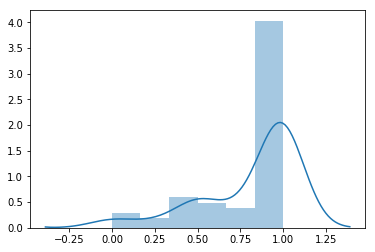

In [226]:
sns.distplot([c._metrics['stab_min_bound'] for c in fm.get_concepts() if c._metrics['stab_min_bound'] is not None])

In [322]:
fm.calc_strongness()

/home/egor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



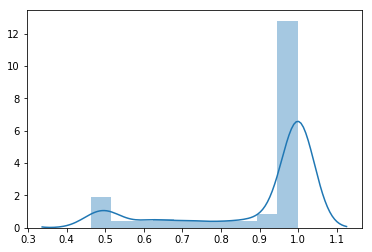

In [229]:
sns.distplot([c._metrics['strongness'] for c in fm.get_concepts()])

In [319]:
len(fm.get_concepts())

96

/home/egor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



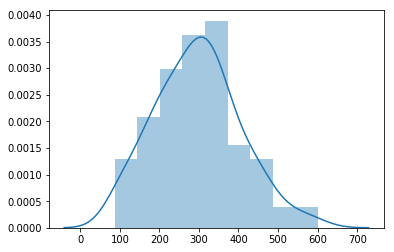

In [232]:
sns.distplot([len(c.get_intent()) for c in fm.get_concepts()])

In [235]:
def get_short_int(int_, cntx_full, use_tqdm=False):
    int_short = int_.copy()
    for i in tqdm(range(len(int_short)), disable=not use_tqdm):
        if len(int_short)>=i:
            break

        for m in int_short:
            int_new = [m_ for m_ in int_short if m_!=m]
            int_new_ = cntx_full.get_intent(cntx_full.get_extent(int_new, is_full=True), is_full=True)
            if len(int_new_)==len(int_):
                int_short = int_new
                break
    return int_short

In [245]:
c = fm.get_concept_by_id(40)

In [246]:
len(get_short_int(c.get_intent(), cntx_full)), len(c.get_intent())

(265, 265)

In [318]:
bin_ds.shape

(25000, 1221)

In [327]:
train_ds.loc[12142]['text']

"I've seen The Blob several times and is one of the better low budget alien invasion movies from the 1950's.<br /><br />A strange meteor lands just outside a small town and an elderly man goes to investigate this. A strange jelly like substance then attaches itself to one of his arms and a young couple who saw the meteor land arrive in time and take him to the local doctor's, where the old man then gets completely absorbed by the mass. The doctor and his nurse are the next victims and the mass is getting bigger. When these incidents are reported to the police, they don't believe the young couple and accuse them of making all this up. They finally believe them when the mass, now huge turns up in the town's cinema and everybody runs into the streets screaming. It then attaches itself on a diner with the young couple and some others inside. The Blob is stopped by spraying a load of fire extinguishers at it and it freezes, which is its weakness. It is then transported by plane to the froze

In [324]:
sorted(fm.get_concepts(), key=lambda c: len(c.get_intent()))[0]

Concept

extent (len: 363): 12142, 5367, 1984, 1950, 1275, 7366, 8354, 7259, 2470, 7137, 1089, 11813, 12282, 4940, 13662, 12207, 1385, 318, 11895, 7512, 996, 7648, 7529, 10205, 6381, 3915, 5073, 13065, 4903, 9742, 4165, 438, 1561, 3013, 10910, 6974, 921, 10552, 10100, 3589, 4405, 7752, 21204, 2963, 7897, 1955, 11847, 11587, 10129, 1219, 11002, 9269, 11100, 9425, 13786, 8057, 5971, 7433, 3748, 11095, 853, 2693, 5266, 5813, 12367, 11142, 8935, 10241, 9969, 7757, 1557, 8591, 4561, 1220, 9820, 4554, 7201, 11444, 12171, 10543, 8229, 8585, 5767, 192, 10407, 7615, 224, 6830, 8231, 6854, 3607, 10345, 2143, 12361, 11989, 2148, 4494, 23277, 10483, 4083, 11719, 1488, 7949, 8893, 9775, 1431, 4743, 697, 7060, 5572, 10005, 8959, 5539, 8571, 6370, 24016, 4016, 12247, 10330, 5512, 4636, 7444, 10915, 6121, 5506, 6610, 12260, 8045, 12222, 446, 3304, 5053, 7498, 3832, 10702, 6592, 11167, 9646, 11364, 2175, 11281, 4518, 18187, 19627, 7693, 6882, 14996, 1508, 544, 13493, 8989, 19472, 150, 8416, 7075, 10017

In [304]:
c

Concept 40
level: 3
extent (len: 9): 10910, 11847, 10915, 12222, 74, 2672, 2890, 10700, 835
intent (len: 265): Appellations, Personal_relationship, Stimulus_focus, Leadership, Containers, Clothing, People_by_vocation, Emotion_directed, Experiencer_obj, Medical_conditions, Kinship, Theft, Killing, Food, Medical_professionals, Desirability, Body_parts, Buildings, Self_motion, Locative_relation, Frequency, Difficulty, Temporal_collocation, Judgment_direct_address, Attaching, Placing, Wearing, Weapon, Desiring, Experiencer_focus, Biological_urge, Relative_time, Giving, Out_of_existence, Intoxication, Success_or_failure, Text, Hedging, Being_attached, Judgment_communication, Firing, Natural_features, Stage_of_progress, Part_orientational, Expertise, Compatibility, Locale_by_use, Body_movement, Quantified_mass, Medical_specialties, Time_vector, Amalgamation, Social_event, Accompaniment, Proportional_quantity, Building_subparts, Preventing_or_letting, Prevarication, Interior_profile_relation,